In [ ]:
import pandas as pd
# Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:

data_set = pd.read_csv('Sentiment Data\processed_data_stemmed.csv')

data_set.head()

,target,Stemmed_content
0,0,switchfoot http twitpic com zl awww bummer sho...
1,0,upset updat facebook text might cri result sch...
2,0,kenichan dive mani time ball manag save rest g...
3,0,whole bodi feel itchi like fire
4,0,nationwideclass behav mad see


In [3]:
data_set['target'].value_counts()

target
0    80000
1    80000
Name: count, dtype: int64

In [4]:
data_set.isnull().sum()

target              0
Stemmed_content    45
dtype: int64

In [5]:
data_set['Stemmed_content'].fillna('', inplace=True)

In [6]:
data_set.isnull().sum()

target             0
Stemmed_content    0
dtype: int64

## seprating the data and lablel
#### data ------> tweet
#### label ------>target

In [7]:
X = data_set['Stemmed_content'].values
Y = data_set['target'].values

In [8]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'morn world take parent meal today ahem forgot rubi anniversari last week blame lisa'
 'drive in fun say' 'like twitter page background']


In [9]:
print(Y)

[0 0 0 ... 1 1 1]


### Spliting the data to training data and test data
#### training data ueds to trained my model
#### test data used to Evaluate my model

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 2)

In [12]:
print("Shape of X (original feature dataset):", X.shape)
print("Shape of X_train (training feature dataset):", X_train.shape)
print("Shape of X_test (testing feature dataset):", X_test.shape)

Shape of X (original feature dataset): (160000,)
Shape of X_train (training feature dataset): (128000,)
Shape of X_test (testing feature dataset): (32000,)


In [13]:
print(X_train)

['aceconcierg enjoy weekend suzi'
 'naasipop go gym car start stupid flat batteri nobodi push jump start'
 'wish could hang stop act weird around hug someth best friend trust' ...
 'tommcfli wish could hear mcfli radio bust work today though'
 'ummeesa nope im crave havent forev'
 'anoth minut bu depot termin frankfurt bu leav pm f']


In [14]:
print(X_test)

['petewentz sound work'
 'lclaurenconrad miss tonight episod wait come onlin'
 'craigsutton sorri bout craig hope feel better got cough hubbi cold plane amp recycl air'
 ... 'long day son fascin flight navig movi classic still golden'
 'happi rain'
 'day work parti famili gf toni food rock band wii bowl pacquiao own hatton good time night']


In [15]:
Y_train[0:100]

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [16]:
Y_test[0:100]

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

## Converting the textual data to numerical data

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer()

In [19]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [20]:
print(X_test)

  (0, 83960)	0.3426897894810549
  (0, 70775)	0.5156963321196779
  (0, 58474)	0.7852521895695299
  (1, 81890)	0.2791310735212626
  (1, 77477)	0.2896263511150312
  (1, 56095)	0.37826628139275653
  (1, 49937)	0.2506307638452937
  (1, 43073)	0.6354036269204244
  (1, 23143)	0.3978536396131715
  (1, 14779)	0.2650961588805155
  (2, 70694)	0.18416410126108312
  (2, 62750)	0.3546455101038162
  (2, 59340)	0.28716800777217066
  (2, 32988)	0.2628877897253557
  (2, 32618)	0.1623593308563729
  (2, 29131)	0.14778396594989907
  (2, 24908)	0.15888162780808496
  (2, 15825)	0.4284864529271617
  (2, 15803)	0.33879786073861196
  (2, 15550)	0.2754100305510961
  (2, 14619)	0.21493950385807697
  (2, 9164)	0.25188536056606636
  (2, 7372)	0.18552181001342669
  (2, 2746)	0.16671379645560117
  (2, 1464)	0.2630556859593746
  :	:
  (31997, 44932)	0.23300279815757083
  (31997, 28853)	0.37233613648516073
  (31997, 25686)	0.3050929522546016
  (31997, 24654)	0.4111574684764619
  (31997, 17859)	0.15699163693462775
  (31

In [21]:
print(X_train)

  (0, 73506)	0.573781613549815
  (0, 82466)	0.31303469655296834
  (0, 22961)	0.3287714835916158
  (0, 519)	0.6816841279383948
  (1, 38960)	0.2966331843078891
  (1, 61156)	0.2985135127178295
  (1, 54542)	0.29313512591438745
  (1, 6310)	0.2998219023412059
  (1, 25608)	0.30330904743790743
  (1, 72654)	0.2435206798253726
  (1, 71716)	0.3886834906787003
  (1, 11355)	0.2302882009951109
  (1, 30116)	0.26929139676946245
  (1, 28707)	0.12936595903924739
  (1, 52597)	0.4499082601904994
  (2, 78440)	0.37367663991065814
  (2, 26642)	0.23381110968372548
  (2, 7270)	0.2550977293487744
  (2, 70459)	0.25748445374464346
  (2, 33018)	0.31013690018817114
  (2, 4243)	0.2778883175479564
  (2, 82521)	0.3256000060606214
  (2, 625)	0.3528860366148864
  (2, 72333)	0.2744754731356303
  (2, 30549)	0.2996869788918702
  :	:
  (127996, 71716)	0.2554331522612117
  (127997, 10565)	0.4383703117459028
  (127997, 48093)	0.394619634141654
  (127997, 61751)	0.37878919218041956
  (127997, 31147)	0.30518852159318155
  (1279

## Training the Machine Learning model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

In [23]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(Y_test, y_pred))
#     print(classification_report(Y_test, y_pred))
    print(f"F1 Score: {f1_score(Y_test, y_pred)*100}")
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(Y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value)
                         for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## 8: Model Building


#### In the problem statement, we have used three different models respectively :

Bernoulli Naive Bayes Classifier



SVM (Support Vector Machine)



Logistic Regression

## 8.1: Model-1 Bernoulli Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.73      0.80      0.76     16000
           1       0.78      0.71      0.74     16000

    accuracy                           0.75     32000
   macro avg       0.75      0.75      0.75     32000
weighted avg       0.75      0.75      0.75     32000

F1 Score: 74.06026106585534


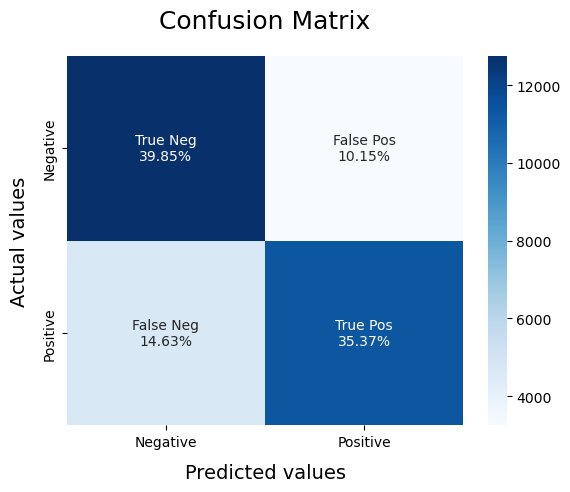

In [24]:
from sklearn.naive_bayes import BernoulliNB
import numpy as np
# Initialize the Bernoulli Naive Bayes model
BNBmodel = BernoulliNB()

# Train the model
BNBmodel.fit(X_train, Y_train)

# Evaluate the model
model_Evaluate(BNBmodel)

# Predict on the test set
y_pred1 = BNBmodel.predict(X_test)


### 8.2: Plot the ROC-AUC Curve for model-1



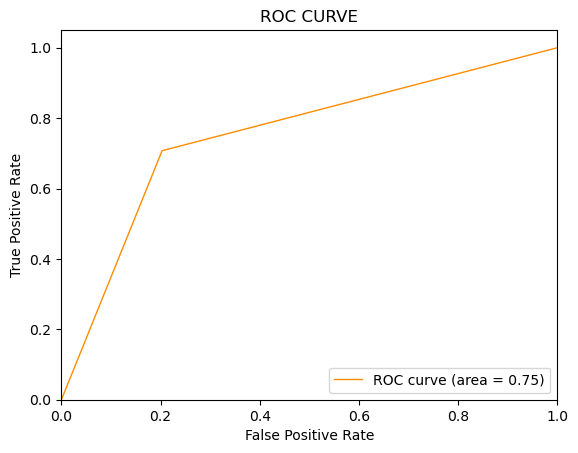

In [25]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## 8.3: Model-2: SVM (Support Vector Machine)

C:\Users\KAMAL CHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.76      0.75      0.75     16000
           1       0.75      0.76      0.76     16000

    accuracy                           0.76     32000
   macro avg       0.76      0.76      0.76     32000
weighted avg       0.76      0.76      0.76     32000

F1 Score: 75.80129696856868


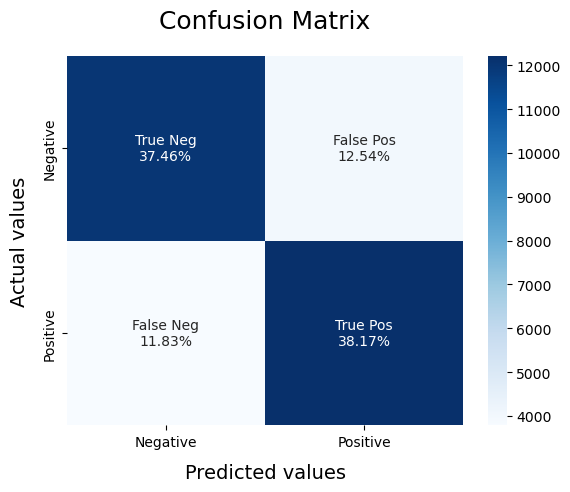

In [26]:
from sklearn.svm import LinearSVC

# Initialize the Linear Support Vector Classifier model
SVCmodel = LinearSVC()

# Train the model
SVCmodel.fit(X_train, Y_train)

# Evaluate the model
model_Evaluate(SVCmodel)

# Predict on the test set
y_pred2 = SVCmodel.predict(X_test)


### 8.4: Plot the ROC-AUC Curve for model-2

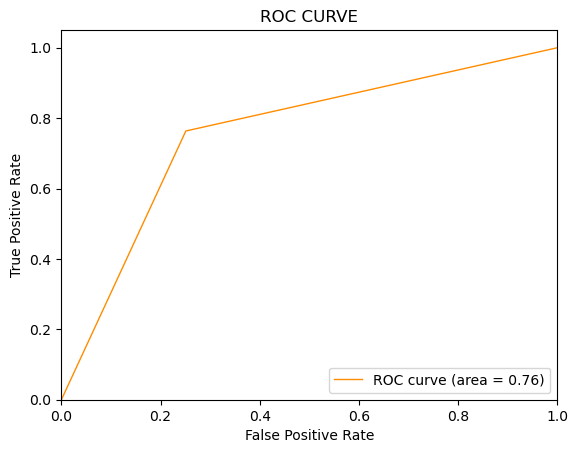

In [27]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## 8.5: Model-3: Logistic Regression

              precision    recall  f1-score   support

           0       0.78      0.75      0.76     16000
           1       0.76      0.79      0.77     16000

    accuracy                           0.77     32000
   macro avg       0.77      0.77      0.77     32000
weighted avg       0.77      0.77      0.77     32000

F1 Score: 77.1834094601637


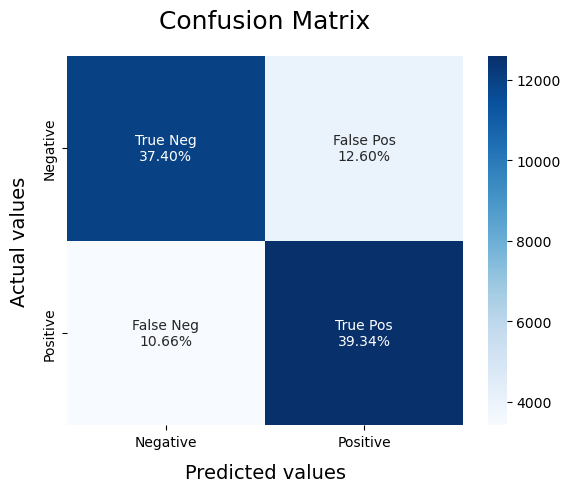

In [28]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with specified parameters
LRmodel = LogisticRegression(max_iter=1000)

# Train the model
LRmodel.fit(X_train, Y_train)

# Evaluate the model
model_Evaluate(LRmodel)

# Predict on the test set
y_pred3 = LRmodel.predict(X_test)


### 8.6: Plot the ROC-AUC Curve for model-3

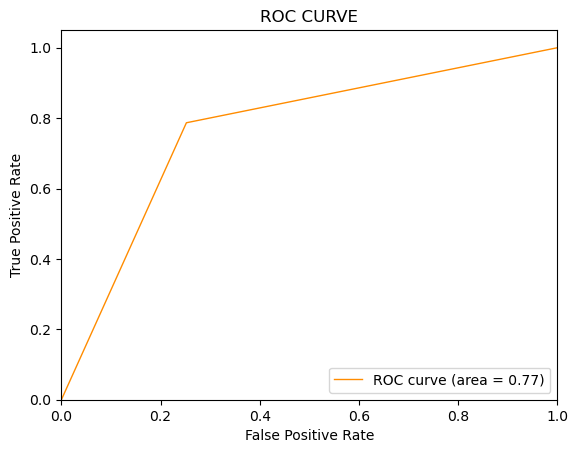

In [29]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## model-4: Multinomial Naive Bayes

              precision    recall  f1-score   support

           0       0.73      0.79      0.76     16000
           1       0.77      0.71      0.74     16000

    accuracy                           0.75     32000
   macro avg       0.75      0.75      0.75     32000
weighted avg       0.75      0.75      0.75     32000

F1 Score: 73.77963283007793


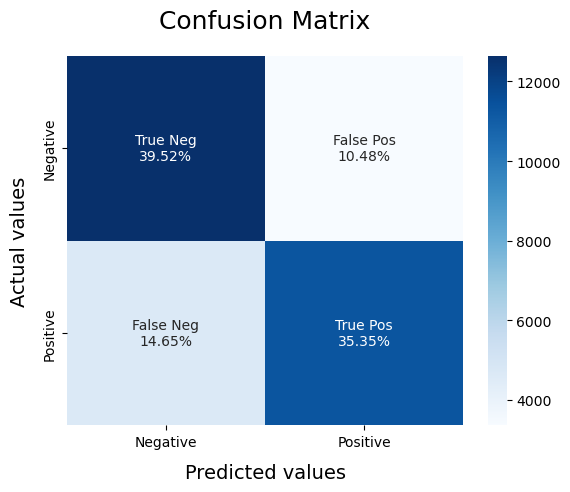

In [30]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes model
MNNBmodel = MultinomialNB()

# Train the model
MNNBmodel.fit(X_train, Y_train)

# Evaluate the model
model_Evaluate(MNNBmodel)
# Predict on the test set
y_pred4 = MNNBmodel.predict(X_test)


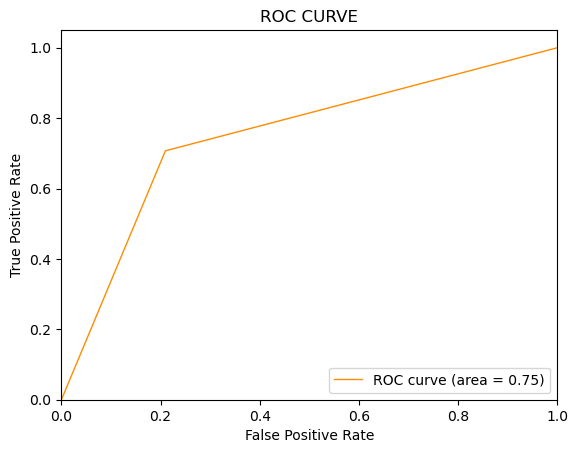

In [31]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, y_pred4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## model-5: Random Forest Classifier

              precision    recall  f1-score   support

           0       0.74      0.66      0.69     16000
           1       0.69      0.76      0.73     16000

    accuracy                           0.71     32000
   macro avg       0.71      0.71      0.71     32000
weighted avg       0.71      0.71      0.71     32000

F1 Score: 72.55402517216814


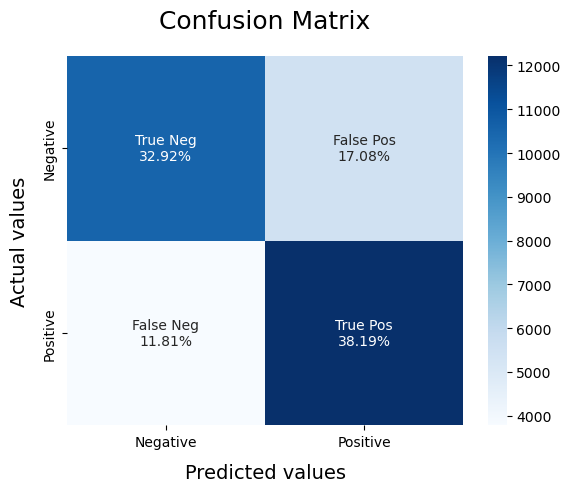

In [32]:
from sklearn.ensemble import RandomForestClassifier

RFCmodel = RandomForestClassifier(n_estimators=100, max_depth=10) 
# Train the model
RFCmodel.fit(X_train, Y_train)

# Evaluate the model
model_Evaluate(RFCmodel)

# Predict on the test set
y_pred_RF = RFCmodel.predict(X_test)


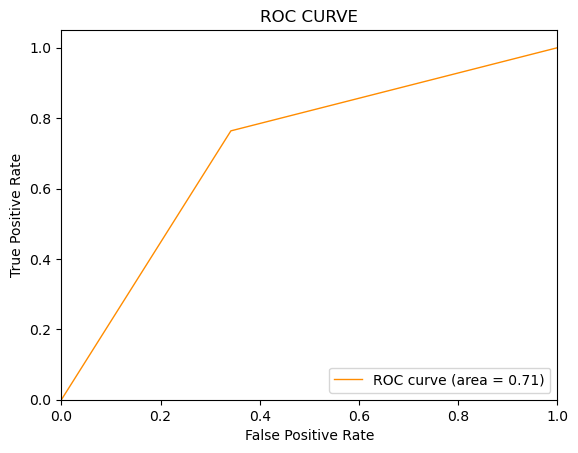

In [33]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_RF)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## model-6

## Accuracy Comparison of Different Models

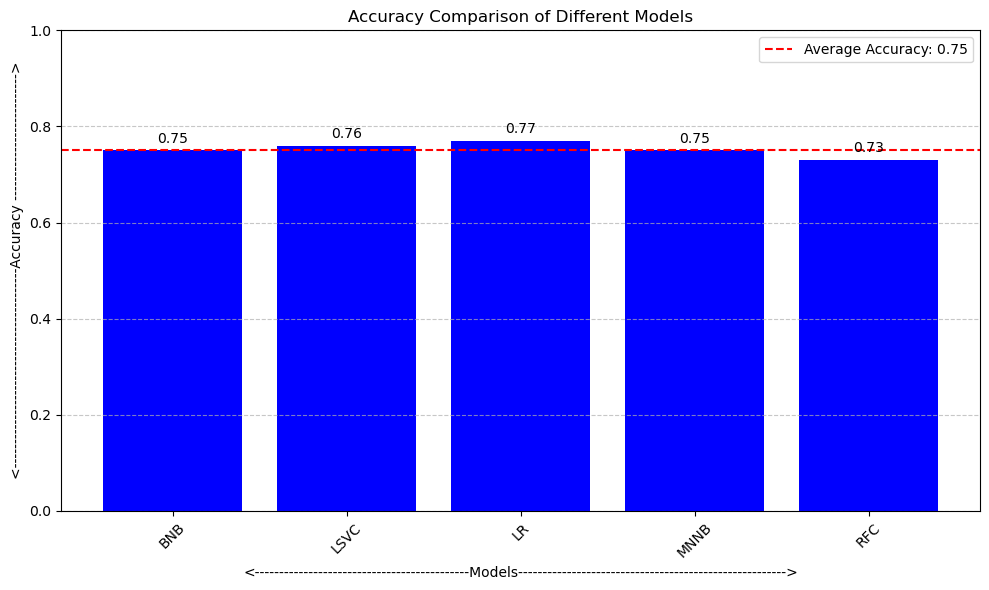

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming accuracies is a list containing all accuracy values
accuracies = [0.75, 0.76, 0.77, 0.75, 0.73]

# Labels for different models or experiments
labels = ['BNB', 'LSVC', 'LR', 'MNNB', 'RFC']  # Add labels accordingly

# Calculate average accuracy
avg_accuracy = np.mean(accuracies)

# Plotting the accuracies
plt.figure(figsize=(10,6))
bars = plt.bar(labels, accuracies, color='blue')

# Adding text labels to each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.01, 
             f'{accuracy:.2f}', 
             ha='center', va='bottom')

# Add horizontal line for average accuracy
plt.axhline(y=avg_accuracy, color='red', linestyle='--', label=f'Average Accuracy: {avg_accuracy:.2f}')

plt.xlabel('<--------------------------------------------Models------------------------------------------------------->')
plt.ylabel('<-----------------------------------------Accuracy -------------------------->')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for accuracy
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Model Evaluation

### Accuracy score

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
def model_Accuracy(model):
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
#     print(f"Accuracy score on the trining data : {training_data_accuracy}")
    return training_data_accuracy

In [37]:
print(f"Bernoulli Naive Bayes model Accuracy: {model_Accuracy(BNBmodel)*100}")
print(f"Support Vector Classifier model Accuracy: {model_Accuracy(SVCmodel)*100}")
print(f"Logistic Regression model Accuracy: {model_Accuracy(LRmodel)*100}")
print(f"Multinomial Naive Bayes model Accuracy: {model_Accuracy(MNNBmodel)*100}")
print(f"Random Forest Classifier model Accuracy: {model_Accuracy(RFCmodel)*100}")

Bernoulli Naive Bayes model Accuracy: 84.01171875
Support Vector Classifier model Accuracy: 90.35625
Logistic Regression model Accuracy: 81.6296875
Multinomial Naive Bayes model Accuracy: 84.62890625
Random Forest Classifier model Accuracy: 72.52109375


In [38]:
# # Accuracy score on the training data
# X_train_prediction = BNBmodel.predict(X_train)
# training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
# print(f"Accuracy score on the trining data : {training_data_accuracy}")

In [39]:
# from sklearn.metrics import accuracy_score

# # Assuming models is a list containing all trained models
# models = [BNBmodel, SVCmodel, LRmodel, MNNBmodel, SGDmodel, RFCmodel]  # Add your models here

# # Loop through each model and calculate the accuracy score on the training data
# for i, model in enumerate(models):
#     X_train_prediction = model.predict(X_train)
#     training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
#     print(f"Accuracy score on the training data for Model {i+1}: {training_data_accuracy}")


In [40]:
# Accuracy score on thr test data
def test_data_accuarcy(model):
    X_test_prediction  = model.predict(X_test)
    test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
#     print(f"Accuracy score on the test data : {test_data_accuracy}")
    return test_data_accuracy

In [42]:
print(f"Bernoulli Naive Bayes model Accuracy: {test_data_accuarcy(BNBmodel)*100}")
print(f"Support Vector Classifier model Accuracy: {test_data_accuarcy(SVCmodel)*100}")
print(f"Logistic Regression model Accuracy: {test_data_accuarcy(LRmodel)*100}")
print(f"Multinomial Naive Bayes model Accuracy: {test_data_accuarcy(MNNBmodel)*100}")
print(f"Random Forest Classifier model Accuracy: {test_data_accuarcy(RFCmodel)*100}")

Bernoulli Naive Bayes model Accuracy: 75.22187500000001
Support Vector Classifier model Accuracy: 75.628125
Logistic Regression model Accuracy: 76.740625
Multinomial Naive Bayes model Accuracy: 74.871875
Random Forest Classifier model Accuracy: 71.10625


#### Model Accuracy = 76.7%